
### data Analysis
1. Do a greater number of restaurants provide online delivery as opposed to offline services?

2. Which types of restaurants are the most favored by the general public?

3. What price range is preferred by couples for their dinner at restaurants?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataframe = pd.read_csv(r"C:\Users\Chetan\Downloads\Zomato data .csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
dataframe.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [5]:
dataframe.shape

(148, 7)

In [6]:
dataframe.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [7]:
dataframe.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [8]:
dataframe.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [9]:
dataframe.duplicated().sum()

np.int64(0)

In [10]:
dataframe_rating =dataframe[['rate']]

In [11]:
dataframe_rating

,rate
0,4.1/5
1,4.1/5
2,3.8/5
3,3.7/5
4,3.8/5
...,...
143,3.3/5
144,3.3/5
145,4.0/5
146,3.0/5


Before proceeding, let’s convert the data type of the “rate” column to float and remove the denominator.

In [12]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];

    return float(value)


dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Exploring column 'listed_in(type)'

C:\Users\Chetan\AppData\Local\Temp\ipykernel_44076\2659512216.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['listed_in(type)'],palette='bright')


Text(0.5, 0, 'Type of restaurant')

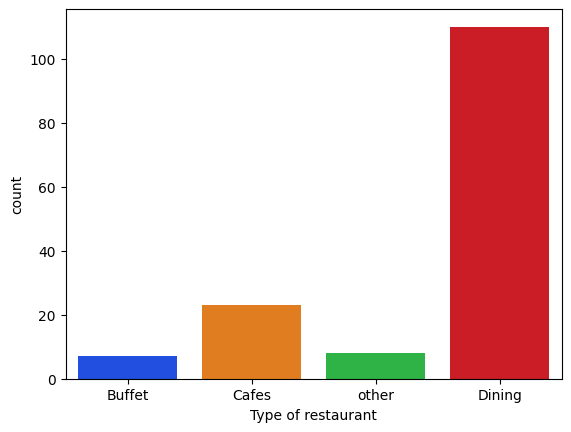

In [14]:
sns.countplot(x=dataframe['listed_in(type)'],palette='bright')
plt.xlabel('Type of restaurant')

conclusion: The majority of the restaurants fall into Dining category

Text(0, 0.5, 'votes')

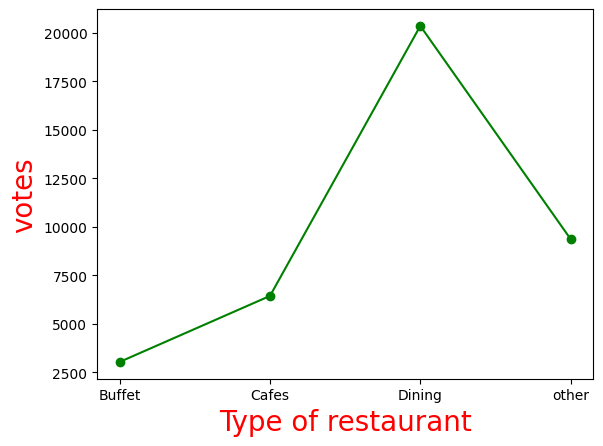

In [15]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant',c='red',size=20)
plt.ylabel('votes', c='red', size=20)

Conclusion : Dinning restaurants are preffered by a larger number of individuals

In [16]:
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Now we will determine the restaurant's name that received the maximum votes based on given dataframe

In [17]:
max_votes = dataframe['votes'].max()
restaurants_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with maximum votes: ")
print(restaurants_with_max_votes)

Restaurant(s) with maximum votes: 
38    Empire Restaurant
Name: name, dtype: object


Lets explore online_order column

C:\Users\Chetan\AppData\Local\Temp\ipykernel_44076\797243703.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['online_order'],palette='bright')


<Axes: xlabel='online_order', ylabel='count'>

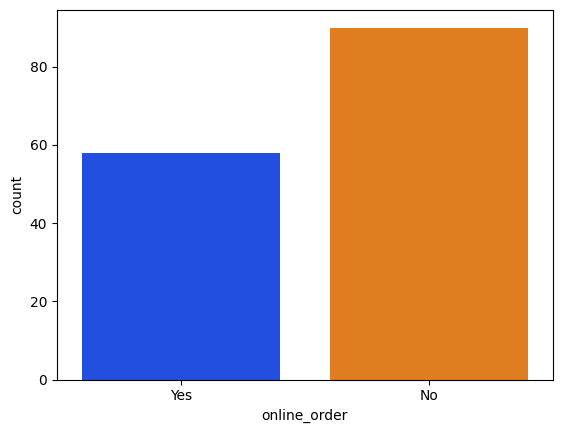

In [18]:
sns.countplot(x=dataframe['online_order'],palette='bright')

Conclusion: This suggests that majority of the restaurants do not accept online orders.

Lets explore the rate column

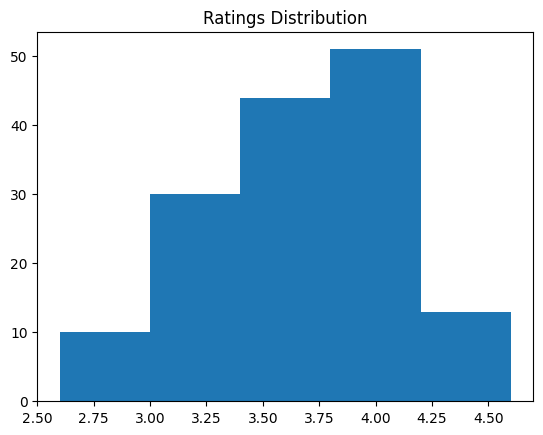

In [19]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

conclusion: majority of restaurants received ratings rangings from 3.5 to 4

Lets's explore the approx_cost(for two people) column.

C:\Users\Chetan\AppData\Local\Temp\ipykernel_44076\3168003243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coulpe_data,palette='bright')


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

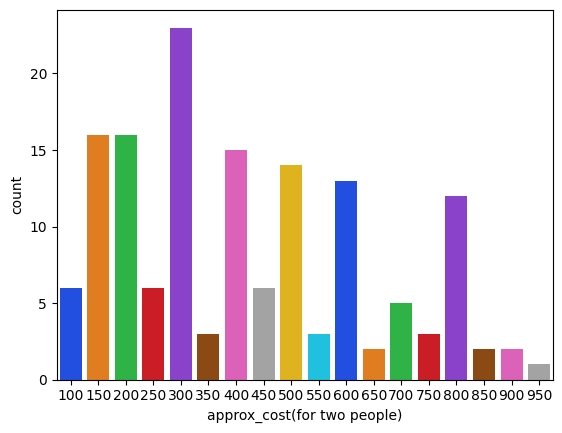

In [20]:
coulpe_data = dataframe['approx_cost(for two people)']
sns.countplot(x=coulpe_data,palette='bright')

Conclusion : The majority of couples prefer restaurants with an approximate cost of 300 rupees.

NOw we will examine whether online orders receive higher ratings tahn offiline orders

C:\Users\Chetan\AppData\Local\Temp\ipykernel_44076\179648276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate', data=dataframe,palette='bright')


<Axes: xlabel='online_order', ylabel='rate'>

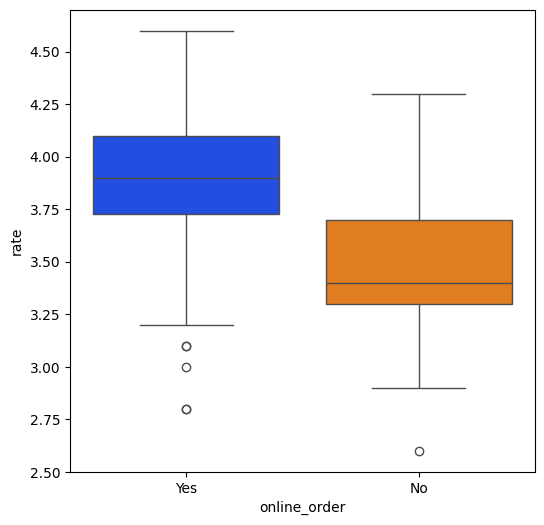

In [22]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y='rate', data=dataframe,palette='bright')

 Conclusion: Offline orders redeived lower ratings in comparision to online orders, which obtained excellent ratings

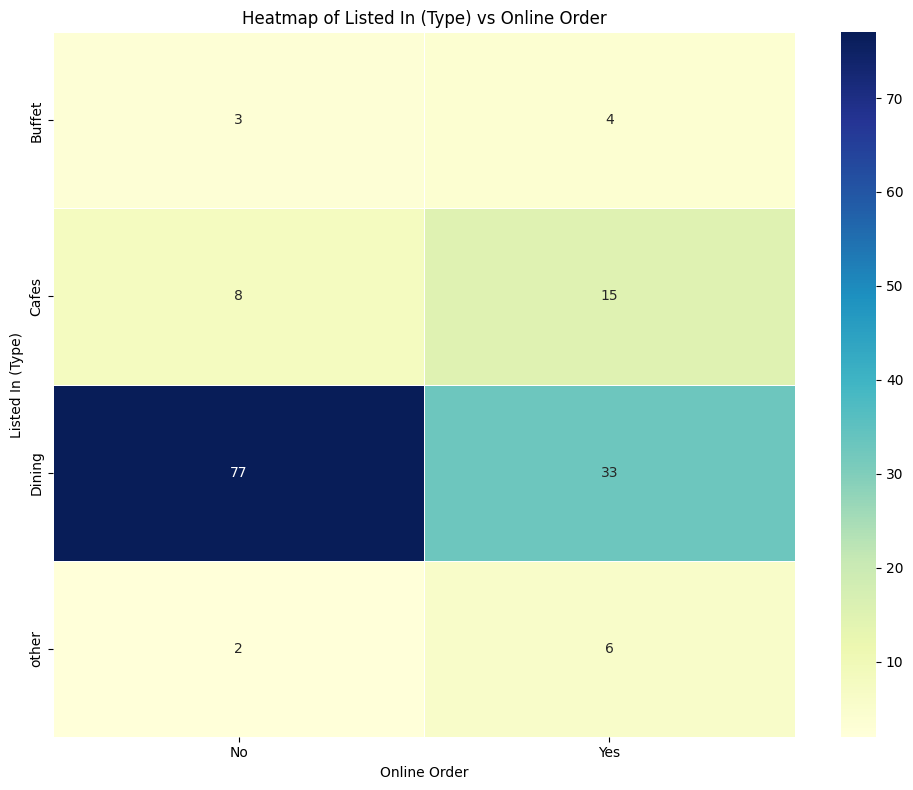

In [28]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d', linewidths=0.5)
plt.title("Heatmap of Listed In (Type) vs Online Order")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.tight_layout()
plt.show()

Conclusion: Dinning restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orderin person at restaurants, but prefer online ordering at cafes.

In [24]:
print(pivot_table)

online_order     No  Yes
listed_in(type)         
Buffet            3    4
Cafes             8   15
Dining           77   33
other             2    6


In [25]:
pivot_table

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


In [26]:
dataframe.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')